<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>
<center><img src='https://upload.wikimedia.org/wikipedia/commons/a/a4/Logo-essec.jpg' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Bachelor AIDAMS</center>
<center>Regression</center>
    <center> Lab 3 : Bike Rental prediction </center>
<hr style=" border:none; height:3px;">
</h1>


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


### Business Goal:
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Loading the Dataset `day.csv`, checking it's contents and checking the data quality

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking it's Shape

df.shape

(730, 16)

In [5]:
# Checking if instant column has unique entries, if yes, then will convert it to index

df['instant'].is_unique
df.set_index('instant', inplace = True)

In [6]:
# Setting the instant column as index to number of columns
print('Number of columns after setting instant as index:', df.shape[1])

Number of columns after setting instant as index: 15


Since the Model is to be built for <b>cnt</b> column, <b>casual</b> and <b>registed</b> are redundant here. It should not be used to build the model, thus dropping these two columns before further processing.

In [7]:
# dropping unnecessary columns

casual = df.pop('casual')
registered = df.pop('registered')

In [8]:
# Checking Columns Data Types

df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [9]:
# Converting the dteday to Date Time
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['dteday'].head()

instant
1   2018-01-01
2   2018-01-02
3   2018-01-03
4   2018-01-04
5   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [10]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [11]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type for future use

df['season']=df['season'].astype('str')
df['weekday']=df['weekday'].astype('str')
df['weathersit']=df['weathersit'].astype('str')
df.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [13]:
# Checking the % of null values in each column

df.isnull().mean()*100


dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [14]:
# Checking the range of values, for example temperature, humidity etc
range_df = pd.DataFrame(columns=['temp', 'hum', 'windspeed', 'atemp'])
range_df.loc[0] = [df['temp'].min(), df['hum'].min(), df['windspeed'].min(), df['atemp'].min()]
range_df.loc[1] = [df['temp'].max(), df['hum'].max(), df['windspeed'].max(), df['atemp'].max()]
range_df.index = ['Min', 'Max']
range_df    


,temp,hum,windspeed,atemp
Min,2.424346,0.00,1.500244,3.95348
Max,35.328347,97.25,34.000021,42.04480


In [15]:
# Converting the weather variable into more understanable text

def weather_desc(x):
    if x == '1':
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif x == '2':
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x == '3':
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    
df['weathersit_desc'] = df['weathersit'].apply(weather_desc)
df[['weathersit', 'weathersit_desc']].drop_duplicates()
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc
instant,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy"
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [16]:
# Converting the seasons into specific season names for better understanding
def season_name(x):
    if x == '1':
        return 'Spring'
    elif x == '2':
        return 'Summer'
    elif x == '3':
        return 'Fall'
    else:
        return 'Winter'

df['season_name']=df['season'].apply(season_name)
df.head(100)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2018-04-06,2,0,Apr,0,3,1,1,16.024153,19.38040,47.0833,17.625221,2808,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
97,2018-04-07,2,0,Apr,0,4,1,1,17.937500,21.68480,60.2917,10.874904,3141,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
98,2018-04-08,2,0,Apr,0,5,1,2,13.769153,16.22395,83.6250,15.208464,1471,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Summer


### Visualizing the data

In [17]:
# Checking linear relationship between the cnt variable and other numeric variables

numeric_features=df.select_dtypes(include=['int64','float64'])
numeric_features.corr()['cnt'].sort_values(ascending=False)


cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64

We should see that there is some corelation between Feeling Temperature and sales. Also the count in 2019 are much higher than the count in 2018 for all circumstances.

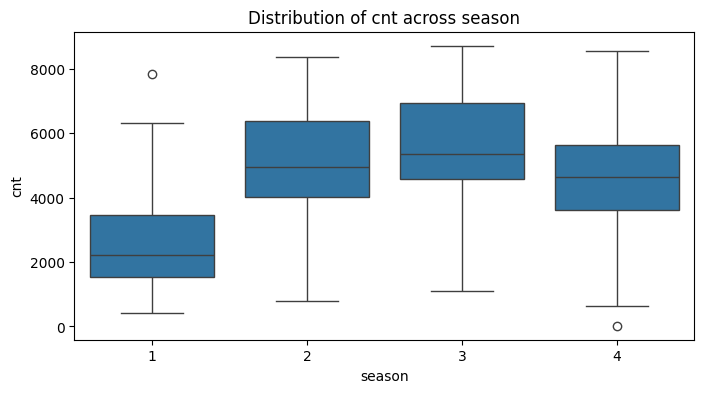

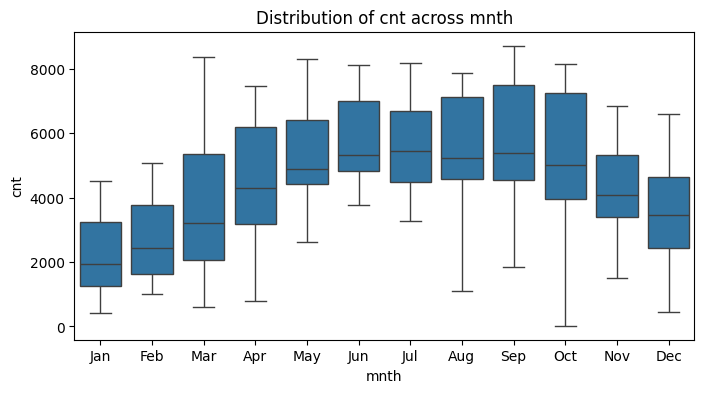

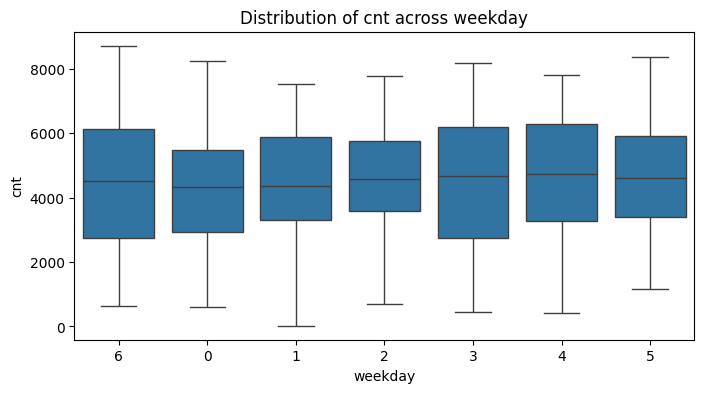

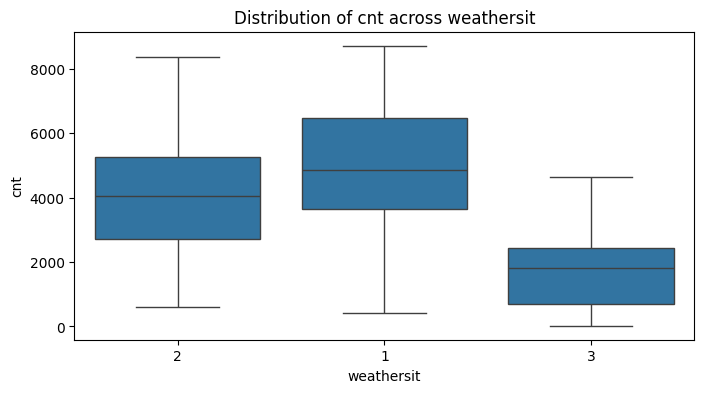

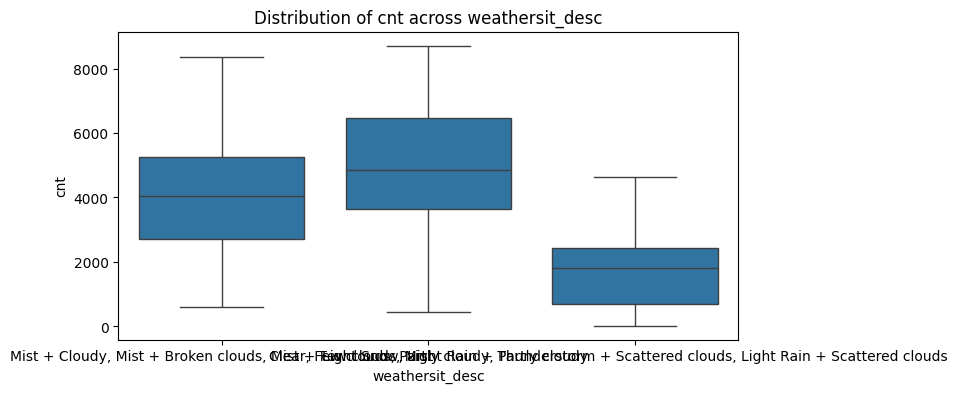

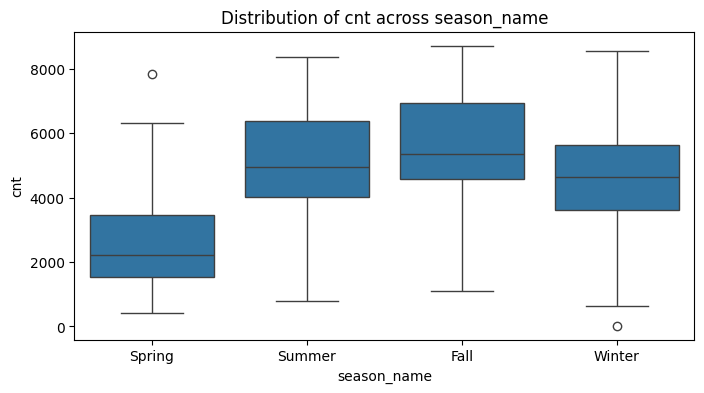

In [18]:
# Checking the distribution of rentals across different categorical variables

categorical_features=df.select_dtypes(include=['object'])
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Distribution of cnt across {col}')
    plt.show()
    

What do you observe ? 

Bike rentals peak in summer and fall, drop sharply in winter.
Weather is a major factor, clear days drive more rentals.
Weekdays have little influence on counts
The monthly trend closely mirrors the seasonal cycle

Count picks up in Good Weather days

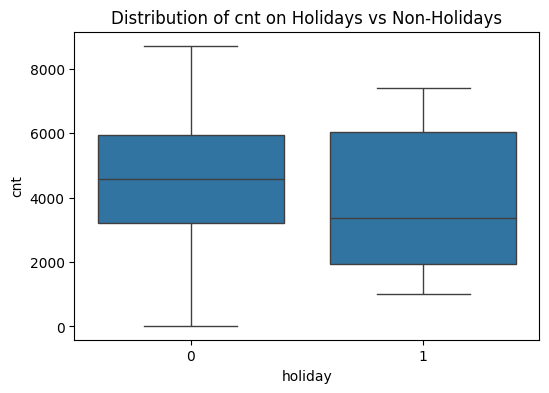

In [19]:
# Checking business on Holidays

plt.figure(figsize=(6,4))
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Distribution of cnt on Holidays vs Non-Holidays')
plt.show()

What do you observe ?

Bike demand is stronger on non-holidays, likely driven by patterns of the day rather than leisure activities

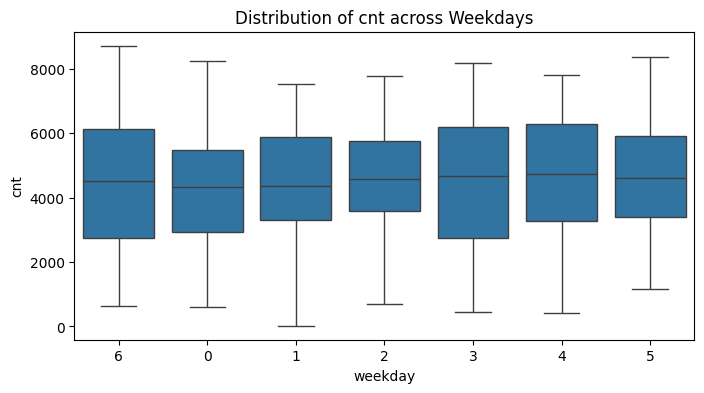

In [20]:
# Total rentals on different days of the week.

plt.figure(figsize=(8,4))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of cnt across Weekdays')
plt.show()

What do you observe ?

Bike rentals remain constant across all weekdays, there is no specifical effect on a specific day of the week.

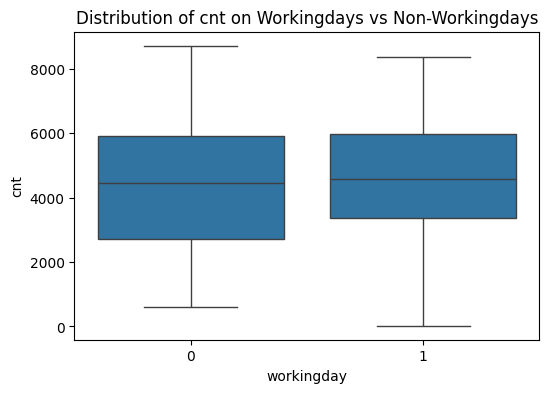

In [21]:
# Checking business on Workingdays

plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Distribution of cnt on Workingdays vs Non-Workingdays')
plt.show()

### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns.
- season
- mnth
- weekday
- weathersit

In [22]:
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [23]:
df = pd.concat([df,dummy], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [24]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (730, 33)


In [25]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it

df = df.drop('dteday', axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [26]:
# Moving the cnt to the end for easier identification

cnt=df.pop('cnt')
df['cnt']=cnt
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_desc,season_name,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,985
2,0,0,0,14.902598,17.68695,69.6087,16.652113,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,801
3,0,0,1,8.050924,9.47025,43.7273,16.636703,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1349
4,0,0,1,8.200000,10.60610,59.0435,10.739832,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1562
5,0,0,1,9.305237,11.46350,43.6957,12.522300,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1600


### Splitting the data into Train and Test Dataset

In [27]:
# print the shape of the train and test data
X = df.drop('cnt', axis=1)
y = df['cnt']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (730, 31)
Shape of y: (730,)


In [28]:
# Checking the Train Data

X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_desc,season_name,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,0,0,0,14.902598,17.68695,69.6087,16.652113,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.050924,9.47025,43.7273,16.636703,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,1,8.200000,10.60610,59.0435,10.739832,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
5,0,0,1,9.305237,11.46350,43.6957,12.522300,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Other than the numeric fields, all other categorical values have been encoded. Now we can go ahead and scale the data.

### Feature Scaling

In [29]:
# Do a MinMax scaling (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# Keep only numeric columns for scaling (strings like weather descriptions will cause errors)
numeric_cols = X.select_dtypes(include=[np.number]).columns
non_numeric_cols = X.columns.difference(numeric_cols)

scaler = MinMaxScaler()
X_scaled_numeric = pd.DataFrame(scaler.fit_transform(X[numeric_cols]),
                                columns=numeric_cols,
                                index=X.index)

# If there are non-numeric columns, keep them as-is and concatenate back so the dataframe structure is preserved
if len(non_numeric_cols) > 0:
    X_scaled = pd.concat([X[non_numeric_cols].reset_index(drop=True),
                          X_scaled_numeric.reset_index(drop=True)],
                         axis=1)
else:
    X_scaled = X_scaled_numeric

X_scaled.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,season_2,season_3,season_4,season_name,weathersit_2,weathersit_3,weathersit_desc,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr,holiday,workingday,temp,atemp,hum,windspeed
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Spring,True,False,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",False,False,False,False,False,True,0.0,0.0,0.0,0.355170,0.373517,0.828620,0.284606
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Spring,True,False,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",False,False,False,False,False,False,0.0,0.0,0.0,0.379232,0.360541,0.715771,0.466215
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",True,False,False,False,False,False,0.0,0.0,1.0,0.171000,0.144830,0.449638,0.465740
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",False,True,False,False,False,False,0.0,0.0,1.0,0.175530,0.174649,0.607131,0.284297
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",False,False,True,False,False,False,0.0,0.0,1.0,0.209120,0.197158,0.449313,0.339143


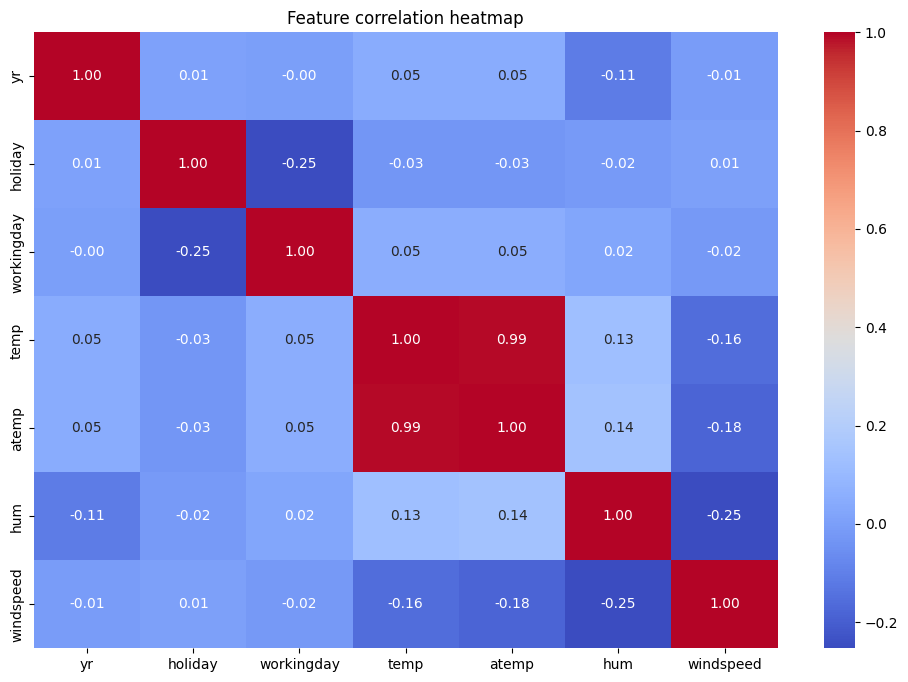

In [30]:
# Checking the Heatmap
plt.figure(figsize=(12,8))
# Use only numeric columns to compute correlations to avoid conversion errors
numeric_for_corr = X_scaled.select_dtypes(include=[np.number])
sns.heatmap(numeric_for_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature correlation heatmap')
plt.show()

What do you observe in terms of colinerity with <b>cnt</b> and between the different features ? 

temp and atemp are highly collinear

Other features show low correlation, low risk of multicolinearity

The rest of the dataset is well-behaving

### Building the Model
Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.<br>
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

<b>There wil be several iterations before getting the perfect model</b>

In [31]:

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Applying OLS model
y_train = df_train.pop('cnt')
X_train = df_train.copy()

# Convert boolean columns to integers
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

# Drop non-numeric columns (object type)
X_train = X_train.select_dtypes(include=[np.number])

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.78e-177
Time:                        14:52:55   Log-Likelihood:                -4111.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     482   BIC:                             8404.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1247.8951    423.981      2.943      0.003     414.816    2080.975
yr            1953.1941     70.852     27.567      0.000    1813.977    2092.411
holiday       -301.9160    200.164     -1.508      0.132    -695.217      91.385
workingday     319.7814     80.428      3.976      0.000     161.749     477.814
temp            49.8430     67.981      0.733      0.464     -83.733     183.419
atemp           57.2838     60.233      0.951      0.342     -61.068     175.635
hum            -14.1556      3.527     -4.014      0.000     -21.085      -7.226
windspeed      -35.1887      8.153     -4.316      0.000     -51.208     -19.170
season_2      1312.9383    241.428      5.438      0.000     838.557    1787.319
season_3      1218.9155    270.052      4.514      0.000     688.291    1749.540
season_4      1855.3484    229.582      8.081      0.000    1404.243    2306.454
mnth_Aug       -67.3818    301.051     -0.224      0.823    -658.915     524.152
mnth_Dec      -296.9277    301.520     -0.985      0.325    -889.384     295.529
mnth_Feb       160.0487    305.891      0.523      0.601    -440.996     761.094
mnth_Jan        35.8592    311.295      0.115      0.908    -575.804     647.522
mnth_Jul      -335.6411    302.347     -1.110      0.268    -929.722     258.440
mnth_Jun        23.0740    217.454      0.106      0.916    -404.202     450.350
mnth_Mar       481.9910    239.490      2.013      0.045      11.417     952.565
mnth_May       274.2786    178.039      1.541      0.124     -75.550     624.107
mnth_Nov      -402.9690    319.372     -1.262      0.208   -1030.503     224.565
mnth_Oct       335.2482    313.893      1.068      0.286    -281.519     952.015
mnth_Sep       639.8977    277.426      2.307      0.022      94.785    1185.011
weekday_1      -53.0812     85.732     -0.619      0.536    -221.535     115.373
weekday_2     -120.6694     96.828     -1.246      0.213    -310.927      69.588
weekday_3       29.0869     96.494      0.301      0.763    -160.515     218.689
weekday_4       52.8505     93.587      0.565      0.573    -131.039     236.739
weekday_5      109.6787     96.661      1.135      0.257     -80.250     299.608
weekday_6      390.7589    126.245      3.095      0.002     142.701     638.817
weathersit_2  -483.9089     92.287     -5.244      0.000    -665.243    -302.575
weathersit_3 -1874.0159    237.366     -7.895      0.000   -2340.416   -1407.615
==============================================================================
Omnibus:                       84.697   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.335
Skew:                          -0.860   Prob(JB):                     3.15e-44
Kurtosis:                       5.539   Cond. No.                     1.02e+16
===============

In [32]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
1,holiday,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
25,weekday_5,inf
21,weekday_1,inf
4,atemp,1857.44
3,temp,1818.87
5,hum,37.88


Are there insignificant variables and variables with strong multicollinearity ? If yes, you need to get rid of them.

In the following cells, you will follow the same process in an iterative manner till you build a robust model. First you will remove all columns with High P Values and then when the P Values are acceptable for all the columns, you will check their VIF and remove them.

In [33]:
# Removing 'mnth_Mar' due to high P-Value and appling OLS again
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.80
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.31e-177
Time:                        14:53:01   Log-Likelihood:                -4113.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     483   BIC:                             8402.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1729.8020    350.995      4.928      0.000    1040.136    2419.468
yr            1961.0191     70.968     27.632      0.000    1821.574    2100.464
holiday       -302.9546    200.794     -1.509      0.132    -697.492      91.583
workingday     328.2073     80.572      4.073      0.000     169.892     486.523
temp            46.8356     68.179      0.687      0.492     -87.128     180.799
atemp           57.3890     60.423      0.950      0.343     -61.335     176.113
hum            -14.0196      3.537     -3.963      0.000     -20.970      -7.069
windspeed      -36.8002      8.139     -4.522      0.000     -52.792     -20.808
season_2      1008.7131    188.842      5.342      0.000     637.661    1379.766
season_3      1016.6883    251.452      4.043      0.000     522.612    1510.764
season_4      1750.8401    224.338      7.804      0.000    1310.042    2191.638
mnth_Aug      -266.0182    285.309     -0.932      0.352    -826.618     294.581
mnth_Dec      -681.0239    234.170     -2.908      0.004   -1141.141    -220.907
mnth_Feb      -283.2302    212.936     -1.330      0.184    -701.625     135.165
mnth_Jan      -414.3503    217.162     -1.908      0.057    -841.050      12.349
mnth_Jul      -528.9227    287.593     -1.839      0.067   -1094.011      36.165
mnth_Jun      -105.2522    208.552     -0.505      0.614    -515.032     304.528
mnth_May       164.6027    170.028      0.968      0.333    -169.483     498.689
mnth_Nov      -737.0854    273.693     -2.693      0.007   -1274.862    -199.309
mnth_Oct        12.5716    270.708      0.046      0.963    -519.339     544.482
mnth_Sep       403.7081    252.173      1.601      0.110     -91.784     899.200
weekday_1      -65.2704     85.787     -0.761      0.447    -233.833     103.292
weekday_2     -115.2908     97.096     -1.187      0.236    -306.074      75.493
weekday_3       32.8884     96.780      0.340      0.734    -157.274     223.050
weekday_4       58.9729     93.833      0.628      0.530    -125.397     243.343
weekday_5      113.9527     96.942      1.175      0.240     -76.528     304.434
weekday_6      390.6794    126.643      3.085      0.002     141.840     639.518
weathersit_2  -480.2643     92.560     -5.189      0.000    -662.134    -298.395
weathersit_3 -1858.5508    237.990     -7.809      0.000   -2326.174   -1390.928
==============================================================================
Omnibus:                       83.051   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.400
Skew:                          -0.838   Prob(JB):                     3.05e-44
Kurtosis:                       5.570   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Stand

In [34]:
# Removing 'weekday_4' due to high P-Value and appling OLS again

X = X.drop('weekday_4',axis=1)
X_train_sm= sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.80
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.31e-177
Time:                        14:53:04   Log-Likelihood:                -4113.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     483   BIC:                             8402.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1729.8020    350.995      4.928      0.000    1040.136    2419.468
yr            1961.0191     70.968     27.632      0.000    1821.574    2100.464
holiday       -243.9817    257.216     -0.949      0.343    -749.382     261.419
workingday     387.1802    128.711      3.008      0.003     134.278     640.082
temp            46.8356     68.179      0.687      0.492     -87.128     180.799
atemp           57.3890     60.423      0.950      0.343     -61.335     176.113
hum            -14.0196      3.537     -3.963      0.000     -20.970      -7.069
windspeed      -36.8002      8.139     -4.522      0.000     -52.792     -20.808
season_2      1008.7131    188.842      5.342      0.000     637.661    1379.766
season_3      1016.6883    251.452      4.043      0.000     522.612    1510.764
season_4      1750.8401    224.338      7.804      0.000    1310.042    2191.638
mnth_Aug      -266.0182    285.309     -0.932      0.352    -826.618     294.581
mnth_Dec      -681.0239    234.170     -2.908      0.004   -1141.141    -220.907
mnth_Feb      -283.2302    212.936     -1.330      0.184    -701.625     135.165
mnth_Jan      -414.3503    217.162     -1.908      0.057    -841.050      12.349
mnth_Jul      -528.9227    287.593     -1.839      0.067   -1094.011      36.165
mnth_Jun      -105.2522    208.552     -0.505      0.614    -515.032     304.528
mnth_May       164.6027    170.028      0.968      0.333    -169.483     498.689
mnth_Nov      -737.0854    273.693     -2.693      0.007   -1274.862    -199.309
mnth_Oct        12.5716    270.708      0.046      0.963    -519.339     544.482
mnth_Sep       403.7081    252.173      1.601      0.110     -91.784     899.200
weekday_1     -124.2433    132.062     -0.941      0.347    -383.730     135.243
weekday_2     -174.2637    133.311     -1.307      0.192    -436.205      87.678
weekday_3      -26.0846    131.041     -0.199      0.842    -283.565     231.396
weekday_5       54.9797    132.994      0.413      0.679    -206.339     316.299
weekday_6      390.6794    126.643      3.085      0.002     141.840     639.518
weathersit_2  -480.2643     92.560     -5.189      0.000    -662.134    -298.395
weathersit_3 -1858.5508    237.990     -7.809      0.000   -2326.174   -1390.928
==============================================================================
Omnibus:                       83.051   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.400
Skew:                          -0.838   Prob(JB):                     3.05e-44
Kurtosis:                       5.570   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [35]:
# Removing 'mnth_Oct' due to high P-Value and appling OLS again

X= X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_4=lr.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.28e-178
Time:                        14:53:07   Log-Likelihood:                -4113.5
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     484   BIC:                             8395.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1731.8927    347.737      4.980      0.000    1048.632    2415.153
yr            1961.0894     70.879     27.668      0.000    1821.821    2100.358
holiday       -243.1997    256.399     -0.949      0.343    -746.993     260.594
workingday     386.9134    128.450      3.012      0.003     134.525     639.301
temp            46.8840     68.101      0.688      0.491     -86.925     180.693
atemp           57.3704     60.359      0.950      0.342     -61.228     175.969
hum            -14.0082      3.525     -3.974      0.000     -20.935      -7.082
windspeed      -36.7970      8.130     -4.526      0.000     -52.772     -20.822
season_2      1006.2291    180.921      5.562      0.000     650.741    1361.717
season_3      1018.6505    247.622      4.114      0.000     532.104    1505.197
season_4      1757.7389    167.931     10.467      0.000    1427.774    2087.704
mnth_Aug      -271.5420    259.065     -1.048      0.295    -780.573     237.489
mnth_Dec      -688.3939    172.013     -4.002      0.000   -1026.379    -350.409
mnth_Feb      -286.2919    202.263     -1.415      0.158    -683.715     111.131
mnth_Jan      -417.3992    206.787     -2.019      0.044    -823.710     -11.089
mnth_Jul      -534.5143    260.905     -2.049      0.041   -1047.161     -21.868
mnth_Jun      -107.7101    201.516     -0.534      0.593    -503.664     288.244
mnth_May       163.6047    168.491      0.971      0.332    -167.459     494.668
mnth_Nov      -747.1819    166.081     -4.499      0.000   -1073.512    -420.852
mnth_Sep       396.9147    205.197      1.934      0.054      -6.271     800.101
weekday_1     -124.0859    131.882     -0.941      0.347    -383.218     135.046
weekday_2     -174.0264    133.076     -1.308      0.192    -435.504      87.451
weekday_3      -25.9344    130.866     -0.198      0.843    -283.070     231.201
weekday_5       55.1805    132.787      0.416      0.678    -205.729     316.091
weekday_6      390.8756    126.442      3.091      0.002     142.433     639.318
weathersit_2  -480.4399     92.387     -5.200      0.000    -661.969    -298.911
weathersit_3 -1858.6963    237.724     -7.819      0.000   -2325.794   -1391.598
==============================================================================
Omnibus:                       82.921   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.865
Skew:                          -0.837   Prob(JB):                     3.98e-44
Kurtosis:                       5.566   Cond. No.                         979.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Removing 'mnth_Jun' due to high P-Value and appling OLS again

X= X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_5=lr.fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     107.1
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.41e-179
Time:                        14:53:09   Log-Likelihood:                -4113.7
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     485   BIC:                             8389.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1745.3795    346.565      5.036      0.000    1064.425    2426.333
yr            1965.5072     70.344     27.942      0.000    1827.291    2103.723
holiday       -229.7338    254.971     -0.901      0.368    -730.717     271.250
workingday     389.4576    128.267      3.036      0.003     137.430     641.485
temp            33.4449     63.242      0.529      0.597     -90.818     157.708
atemp           66.3827     57.914      1.146      0.252     -47.410     180.175
hum            -13.7359      3.486     -3.941      0.000     -20.585      -6.887
windspeed      -35.9914      7.983     -4.508      0.000     -51.677     -20.305
season_2       989.8632    178.180      5.555      0.000     639.763    1339.963
season_3       990.0849    241.607      4.098      0.000     515.358    1464.811
season_4      1763.4245    167.471     10.530      0.000    1434.367    2092.482
mnth_Aug      -192.4608    212.504     -0.906      0.366    -610.002     225.081
mnth_Dec      -703.9744    169.401     -4.156      0.000   -1036.824    -371.125
mnth_Feb      -299.5473    200.589     -1.493      0.136    -693.679      94.584
mnth_Jan      -438.1180    202.971     -2.159      0.031    -836.930     -39.306
mnth_Jul      -450.0423    207.440     -2.170      0.031    -857.635     -42.449
mnth_May       208.5468    145.903      1.429      0.154     -78.134     495.227
mnth_Nov      -757.8615    164.754     -4.600      0.000   -1081.581    -434.142
mnth_Sep       451.8774    177.440      2.547      0.011     103.230     800.524
weekday_1     -129.2590    131.430     -0.983      0.326    -387.501     128.983
weekday_2     -174.5253    132.974     -1.312      0.190    -435.802      86.752
weekday_3      -22.5970    130.620     -0.173      0.863    -279.249     234.055
weekday_5       52.3263    132.582      0.395      0.693    -208.179     312.832
weekday_6      390.9399    126.349      3.094      0.002     142.682     639.198
weathersit_2  -484.1950     92.052     -5.260      0.000    -665.064    -303.326
weathersit_3 -1861.4487    237.493     -7.838      0.000   -2328.091   -1394.807
==============================================================================
Omnibus:                       83.870   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.573
Skew:                          -0.840   Prob(JB):                     2.29e-45
Kurtosis:                       5.614   Cond. No.                         879.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Removing 'weekday_3' due to high P-Value and appling OLS again

X= X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_6=lr.fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     111.8
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.34e-180
Time:                        14:53:11   Log-Likelihood:                -4113.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     486   BIC:                             8383.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1746.7159    346.133      5.046      0.000    1066.614    2426.817
yr            1965.6469     70.269     27.973      0.000    1827.579    2103.715
holiday       -239.8474    247.930     -0.967      0.334    -726.995     247.300
workingday     378.2851    110.712      3.417      0.001     160.753     595.817
temp            32.8376     63.082      0.521      0.603     -91.109     156.784
atemp           67.0009     57.745      1.160      0.247     -46.461     180.462
hum            -13.8149      3.452     -4.002      0.000     -20.598      -7.032
windspeed      -35.9730      7.975     -4.511      0.000     -51.642     -20.304
season_2       990.4554    177.969      5.565      0.000     640.771    1340.139
season_3       991.3181    241.261      4.109      0.000     517.274    1465.362
season_4      1764.3055    167.226     10.550      0.000    1435.730    2092.881
mnth_Aug      -193.5033    212.206     -0.912      0.362    -610.458     223.451
mnth_Dec      -703.0644    169.150     -4.156      0.000   -1035.420    -370.709
mnth_Feb      -299.1238    200.374     -1.493      0.136    -692.831      94.583
mnth_Jan      -436.5523    202.567     -2.155      0.032    -834.568     -38.537
mnth_Jul      -451.4593    207.072     -2.180      0.030    -858.325     -44.593
mnth_May       207.7590    145.687      1.426      0.154     -78.494     494.012
mnth_Nov      -757.2568    164.552     -4.602      0.000   -1080.578    -433.935
mnth_Sep       451.3319    177.235      2.547      0.011     103.090     799.574
weekday_1     -118.4106    115.389     -1.026      0.305    -345.134     108.313
weekday_2     -163.2055    115.646     -1.411      0.159    -390.433      64.022
weekday_5       63.3041    116.293      0.544      0.586    -165.195     291.804
weekday_6      390.8257    126.221      3.096      0.002     142.820     638.831
weathersit_2  -482.9368     91.672     -5.268      0.000    -663.060    -302.814
weathersit_3 -1861.6102    237.254     -7.846      0.000   -2327.780   -1395.440
==============================================================================
Omnibus:                       83.716   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.653
Skew:                          -0.840   Prob(JB):                     3.63e-45
Kurtosis:                       5.606   Cond. No.                         879.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Removing 'atemp' due to high P-Value

X= X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_7=lr.fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     116.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          2.38e-181
Time:                        14:53:13   Log-Likelihood:                -4114.4
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     487   BIC:                             8378.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1878.1685    327.183      5.740      0.000    1235.305    2521.032
yr            1965.5321     70.294     27.962      0.000    1827.416    2103.648
holiday       -262.8777    247.222     -1.063      0.288    -748.632     222.876
workingday     379.6158    110.745      3.428      0.001     162.019     597.213
temp           105.0838     10.115     10.389      0.000      85.209     124.958
hum            -13.3452      3.429     -3.891      0.000     -20.084      -6.607
windspeed      -38.5021      7.674     -5.017      0.000     -53.580     -23.425
season_2       998.6470    177.892      5.614      0.000     649.116    1348.178
season_3       980.5808    241.169      4.066      0.000     506.720    1454.441
season_4      1773.3673    167.103     10.612      0.000    1445.035    2101.699
mnth_Aug      -209.6501    211.825     -0.990      0.323    -625.853     206.553
mnth_Dec      -702.2444    169.208     -4.150      0.000   -1034.713    -369.776
mnth_Feb      -302.3608    200.426     -1.509      0.132    -696.167      91.446
mnth_Jan      -456.0890    201.938     -2.259      0.024    -852.866     -59.312
mnth_Jul      -450.2775    207.143     -2.174      0.030    -857.281     -43.274
mnth_May       203.5587    145.693      1.397      0.163     -82.707     489.824
mnth_Nov      -756.4858    164.609     -4.596      0.000   -1079.918    -433.054
mnth_Sep       441.7983    177.108      2.495      0.013      93.809     789.788
weekday_1     -108.4482    115.110     -0.942      0.347    -334.622     117.726
weekday_2     -168.3367    115.602     -1.456      0.146    -395.477      58.804
weekday_5       67.1068    116.288      0.577      0.564    -161.382     295.596
weekday_6      392.2728    126.259      3.107      0.002     144.192     640.353
weathersit_2  -492.9043     91.301     -5.399      0.000    -672.297    -313.511
weathersit_3 -1900.5158    234.956     -8.089      0.000   -2362.168   -1438.863
==============================================================================
Omnibus:                       81.692   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.285
Skew:                          -0.823   Prob(JB):                     8.77e-44
Kurtosis:                       5.570   Cond. No.                         814.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Removing 'weekday_5' due to high P-Value

X= X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_8=lr.fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          2.51e-182
Time:                        14:53:16   Log-Likelihood:                -4114.6
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     488   BIC:                             8373.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1874.7809    326.906      5.735      0.000    1232.463    2517.099
yr            1967.6796     70.147     28.051      0.000    1829.852    2105.507
holiday       -239.8788    243.822     -0.984      0.326    -718.949     239.191
workingday     400.9171    104.341      3.842      0.000     195.905     605.930
temp           105.0357     10.108     10.392      0.000      85.175     124.896
hum            -13.2825      3.425     -3.878      0.000     -20.013      -6.552
windspeed      -38.4954      7.668     -5.020      0.000     -53.562     -23.428
season_2       998.4163    177.770      5.616      0.000     649.127    1347.706
season_3       975.2943    240.830      4.050      0.000     502.102    1448.487
season_4      1771.1902    166.946     10.609      0.000    1443.168    2099.212
mnth_Aug      -205.0498    211.530     -0.969      0.333    -620.671     210.572
mnth_Dec      -704.6361    169.042     -4.168      0.000   -1036.776    -372.496
mnth_Feb      -304.5276    200.254     -1.521      0.129    -697.994      88.939
mnth_Jan      -454.8192    201.788     -2.254      0.025    -851.299     -58.339
mnth_Jul      -445.3244    206.823     -2.153      0.032    -851.699     -38.950
mnth_May       203.4948    145.594      1.398      0.163     -82.573     489.563
mnth_Nov      -754.3570    164.455     -4.587      0.000   -1077.485    -431.229
mnth_Sep       444.1570    176.939      2.510      0.012      96.500     791.814
weekday_1     -130.0955    108.752     -1.196      0.232    -343.776      83.585
weekday_2     -189.1414    109.762     -1.723      0.085    -404.805      26.522
weekday_6      393.0222    126.166      3.115      0.002     145.126     640.919
weathersit_2  -492.5420     91.237     -5.399      0.000    -671.807    -313.277
weathersit_3 -1911.0463    234.086     -8.164      0.000   -2370.987   -1451.105
==============================================================================
Omnibus:                       81.362   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.854
Skew:                          -0.819   Prob(JB):                     1.09e-43
Kurtosis:                       5.571   Cond. No.                         814.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Removing 'mnth_Aug' due to high P-Value
X= X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model_9=lr.fit()
lr_model_9.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          3.50e-183
Time:                        14:53:19   Log-Likelihood:                -4115.1
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     489   BIC:                             8367.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1880.7671    326.828      5.755      0.000    1238.607    2522.927
yr            1968.8205     70.133     28.073      0.000    1831.022    2106.619
holiday       -230.5723    243.618     -0.946      0.344    -709.239     248.094
workingday     405.3039    104.236      3.888      0.000     200.498     610.110
temp           104.2175     10.072     10.347      0.000      84.428     124.007
hum            -13.3414      3.425     -3.896      0.000     -20.070      -6.612
windspeed      -38.4180      7.667     -5.011      0.000     -53.483     -23.353
season_2      1007.8559    177.492      5.678      0.000     659.114    1356.598
season_3       859.2748    208.972      4.112      0.000     448.681    1269.868
season_4      1761.8667    166.659     10.572      0.000    1434.411    2089.322
mnth_Dec      -696.1727    168.806     -4.124      0.000   -1027.847    -364.498
mnth_Feb      -302.9840    200.235     -1.513      0.131    -696.412      90.444
mnth_Jan      -455.5626    201.774     -2.258      0.024    -852.013     -59.112
mnth_Jul      -312.5388    154.948     -2.017      0.044    -616.985      -8.093
mnth_May       205.9473    145.563      1.415      0.158     -80.058     491.953
mnth_Nov      -741.2455    163.888     -4.523      0.000   -1063.258    -419.233
mnth_Sep       545.8052    142.511      3.830      0.000     265.796     825.814
weekday_1     -131.0757    108.741     -1.205      0.229    -344.733      82.581
weekday_2     -184.7428    109.661     -1.685      0.093    -400.208      30.722
weekday_6      401.9662    125.821      3.195      0.001     154.750     649.183
weathersit_2  -494.5825     91.207     -5.423      0.000    -673.788    -315.377
weathersit_3 -1907.4447    234.042     -8.150      0.000   -2367.297   -1447.592
==============================================================================
Omnibus:                       79.632   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.084
Skew:                          -0.804   Prob(JB):                     1.18e-42
Kurtosis:                       5.547   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Removing 'weekday_2' due to high P-Value

X= X.drop('weekday_2',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.4
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.22e-183
Time:                        14:53:22   Log-Likelihood:                -4116.5
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     490   BIC:                             8364.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1913.7951    326.851      5.855      0.000    1271.593    2555.997
yr            1970.6482     70.256     28.050      0.000    1832.608    2108.688
holiday       -279.9672    242.300     -1.155      0.248    -756.043     196.108
workingday     360.4790    100.972      3.570      0.000     162.088     558.870
temp           104.2059     10.091     10.327      0.000      84.379     124.032
hum            -13.7736      3.421     -4.026      0.000     -20.496      -7.051
windspeed      -39.1688      7.669     -5.108      0.000     -54.237     -24.101
season_2      1011.9678    177.808      5.691      0.000     662.607    1361.328
season_3       868.3175    209.294      4.149      0.000     457.093    1279.542
season_4      1767.9057    166.932     10.591      0.000    1439.914    2095.897
mnth_Dec      -698.1679    169.118     -4.128      0.000   -1030.454    -365.882
mnth_Feb      -302.5074    200.610     -1.508      0.132    -696.670      91.655
mnth_Jan      -452.2078    202.142     -2.237      0.026    -849.380     -55.035
mnth_Jul      -323.3684    155.105     -2.085      0.038    -628.121     -18.616
mnth_May       198.3911    145.766      1.361      0.174     -88.013     484.795
mnth_Nov      -744.1221    164.186     -4.532      0.000   -1066.718    -421.526
mnth_Sep       544.1572    142.775      3.811      0.000     263.631     824.683
weekday_1      -86.0136    105.597     -0.815      0.416    -293.493     121.465
weekday_6      401.3157    126.056      3.184      0.002     153.639     648.993
weathersit_2  -493.0041     91.373     -5.396      0.000    -672.535    -313.473
weathersit_3 -1902.9712    234.466     -8.116      0.000   -2363.653   -1442.289
==============================================================================
Omnibus:                       81.928   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.215
Skew:                          -0.809   Prob(JB):                     6.12e-46
Kurtosis:                       5.676   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Removing 'weekday_1' due to high P-Value

X= X.drop('weekday_1',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.5
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.41e-184
Time:                        14:53:25   Log-Likelihood:                -4116.9
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     491   BIC:                             8358.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1921.3228    326.608      5.883      0.000    1279.601    2563.045
yr            1968.5103     70.183     28.048      0.000    1830.615    2106.406
holiday       -348.0414    227.353     -1.531      0.126    -794.746      98.663
workingday     343.6636     98.805      3.478      0.001     149.531     537.797
temp           104.2816     10.087     10.338      0.000      84.463     124.100
hum            -13.8709      3.418     -4.058      0.000     -20.587      -7.155
windspeed      -39.3935      7.661     -5.142      0.000     -54.446     -24.341
season_2      1010.3451    177.736      5.685      0.000     661.128    1359.562
season_3       868.6181    209.222      4.152      0.000     457.537    1279.699
season_4      1767.9752    166.875     10.595      0.000    1440.098    2095.853
mnth_Dec      -697.2200    169.056     -4.124      0.000   -1029.383    -365.057
mnth_Feb      -300.3601    200.524     -1.498      0.135    -694.351      93.631
mnth_Jan      -449.9592    202.054     -2.227      0.026    -846.956     -52.962
mnth_Jul      -324.0144    155.049     -2.090      0.037    -628.657     -19.372
mnth_May       202.2627    145.639      1.389      0.166     -83.890     488.415
mnth_Nov      -740.6702    164.075     -4.514      0.000   -1063.047    -418.294
mnth_Sep       546.6151    142.694      3.831      0.000     266.249     826.981
weekday_6      400.7343    126.011      3.180      0.002     153.147     648.321
weathersit_2  -492.7583     91.341     -5.395      0.000    -672.226    -313.291
weathersit_3 -1888.5064    233.712     -8.080      0.000   -2347.706   -1429.307
==============================================================================
Omnibus:                       80.207   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.032
Skew:                          -0.796   Prob(JB):                     1.35e-44
Kurtosis:                       5.637   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Removing 'mnth_May' due to high P-Value

X= X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          2.97e-185
Time:                        14:53:27   Log-Likelihood:                -4117.9
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     492   BIC:                             8354.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1858.1116    323.726      5.740      0.000    1222.055    2494.168
yr            1971.5871     70.214     28.080      0.000    1833.631    2109.543
holiday       -343.3451    227.542     -1.509      0.132    -790.420     103.729
workingday     347.3142     98.863      3.513      0.000     153.068     541.561
temp           106.2056     10.001     10.620      0.000      86.556     125.855
hum            -13.2712      3.394     -3.910      0.000     -19.940      -6.603
windspeed      -39.8045      7.663     -5.195      0.000     -54.860     -24.749
season_2      1068.8122    172.841      6.184      0.000     729.214    1408.410
season_3       842.0322    208.541      4.038      0.000     432.291    1251.773
season_4      1754.4312    166.747     10.522      0.000    1426.807    2082.056
mnth_Dec      -686.8968    169.052     -4.063      0.000   -1019.050    -354.744
mnth_Feb      -291.0836    200.602     -1.451      0.147    -685.226     103.059
mnth_Jan      -436.1605    202.000     -2.159      0.031    -833.049     -39.272
mnth_Jul      -328.3223    155.165     -2.116      0.035    -633.190     -23.455
mnth_Nov      -726.9195    163.931     -4.434      0.000   -1049.011    -404.828
mnth_Sep       544.9114    142.823      3.815      0.000     264.293     825.530
weekday_6      402.5424    126.123      3.192      0.002     154.736     650.349
weathersit_2  -500.2429     91.268     -5.481      0.000    -679.566    -320.920
weathersit_3 -1910.5894    233.391     -8.186      0.000   -2369.155   -1452.024
==============================================================================
Omnibus:                       77.646   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.356
Skew:                          -0.788   Prob(JB):                     3.42e-41
Kurtosis:                       5.503   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Removing 'mnth_Feb' due to high P-Value

X= X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.2
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          6.65e-186
Time:                        14:53:29   Log-Likelihood:                -4119.0
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     493   BIC:                             8350.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1655.4318    292.369      5.662      0.000    1080.988    2229.876
yr            1968.4685     70.260     28.017      0.000    1830.423    2106.514
holiday       -338.5589    227.773     -1.486      0.138    -786.085     108.967
workingday     344.5258     98.955      3.482      0.001     150.099     538.952
temp           109.5338      9.745     11.240      0.000      90.387     128.681
hum            -13.4947      3.394     -3.976      0.000     -20.164      -6.826
windspeed      -39.8740      7.671     -5.198      0.000     -54.946     -24.802
season_2      1209.7046    143.151      8.451      0.000     928.444    1490.965
season_3       962.9338    191.387      5.031      0.000     586.898    1338.969
season_4      1877.6555    143.664     13.070      0.000    1595.387    2159.924
mnth_Dec      -590.7703    155.706     -3.794      0.000    -896.699    -284.842
mnth_Jan      -252.6711    157.700     -1.602      0.110    -562.518      57.176
mnth_Jul      -333.3105    155.300     -2.146      0.032    -638.443     -28.178
mnth_Nov      -683.0446    161.299     -4.235      0.000    -999.963    -366.127
mnth_Sep       556.0189    142.778      3.894      0.000     275.491     836.546
weekday_6      399.0702    126.242      3.161      0.002     151.032     647.108
weathersit_2  -487.8739     90.971     -5.363      0.000    -666.612    -309.135
weathersit_3 -1887.2396    233.096     -8.096      0.000   -2345.224   -1429.255
==============================================================================
Omnibus:                       72.476   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.292
Skew:                          -0.746   Prob(JB):                     1.05e-37
Kurtosis:                       5.402   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

In [45]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,33.15
4,hum,23.04
7,season_3,7.86
5,windspeed,5.96
2,workingday,5.11
6,season_2,4.43
8,season_4,4.34
15,weathersit_2,2.19
0,yr,2.08
12,mnth_Nov,1.95


What do you observe ?

Multicolinearity exists in temp (VIF 33.15) and hum (VIF 23.04)

Moderate multicollinearity in season_3, windspeed, and workingday.

All other variables are in acceptable limits.

Maybe drop or merge some columns

In [46]:
# Removing 'hum' due to high VIF

X=X.drop('hum',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     160.1
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.18e-183
Time:                        14:53:35   Log-Likelihood:                -4127.0
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     494   BIC:                             8360.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          888.0066    222.855      3.985      0.000     450.145    1325.868
yr            2008.4373     70.571     28.460      0.000    1869.781    2147.094
holiday       -336.1728    231.161     -1.454      0.147    -790.352     118.007
workingday     362.4123    100.324      3.612      0.000     165.299     559.526
temp           102.4585      9.724     10.537      0.000      83.354     121.563
windspeed      -30.9854      7.447     -4.161      0.000     -45.618     -16.353
season_2      1221.0491    145.251      8.406      0.000     935.663    1506.436
season_3       989.4918    194.116      5.097      0.000     608.097    1370.887
season_4      1847.0559    145.591     12.687      0.000    1561.001    2133.110
mnth_Dec      -644.3531    157.429     -4.093      0.000    -953.666    -335.040
mnth_Jan      -291.8235    159.734     -1.827      0.068    -605.664      22.017
mnth_Jul      -291.0746    157.241     -1.851      0.065    -600.019      17.870
mnth_Nov      -692.9519    163.679     -4.234      0.000   -1014.544    -371.360
mnth_Sep       498.4048    144.153      3.457      0.001     215.176     781.634
weekday_6      414.2004    128.061      3.234      0.001     162.589     665.812
weathersit_2  -696.3000     75.452     -9.228      0.000    -844.546    -548.054
weathersit_3 -2271.7517    215.239    -10.555      0.000   -2694.649   -1848.855
==============================================================================
Omnibus:                       72.119   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.137
Skew:                          -0.728   Prob(JB):                     3.43e-39
Kurtosis:                       5.490   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Checking the VIF Again

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,21.18
6,season_3,7.64
4,windspeed,5.82
2,workingday,4.95
5,season_2,4.41
7,season_4,4.32
0,yr,2.08
11,mnth_Nov,1.89
13,weekday_6,1.88
10,mnth_Jul,1.85


Does it looks like an acceptable model ? 

The model is acceptable for interpretation and prediction.
But consider handling temp to improve.

In [48]:
# Checking the co-efficients of the final model 

coefficients=pd.DataFrame(lr_model.params, columns=['Coefficient'])
coefficients['Feature'] = coefficients.index
coefficients = coefficients[['Feature', 'Coefficient']]
coefficients


,Feature,Coefficient
const,const,888.006567
yr,yr,2008.437293
holiday,holiday,-336.172790
workingday,workingday,362.412285
temp,temp,102.458543
windspeed,windspeed,-30.985374
season_2,season_2,1221.049144
season_3,season_3,989.491813
season_4,season_4,1847.055928
mnth_Dec,mnth_Dec,-644.353069


### Validating the assumptions of Linear Regression
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

In [49]:
# Validating Linear Relationship
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']
# Convert boolean columns to integers
bool_cols_test = X_test.select_dtypes(include=['bool']).columns
X_test[bool_cols_test] = X_test[bool_cols_test].astype(int)
# Drop non-numeric columns (object type)
X_test = X_test.select_dtypes(include=[np.number])
X_test = X_test[X.columns]  # Ensure the test set has the same columns as the training set
X_test_sm = sm.add_constant(X_test)
y_pred = lr_model.predict(X_test_sm)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')

R-squared: 0.8343
Mean Squared Error: 614948.3207
Mean Absolute Error: 580.9867


The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

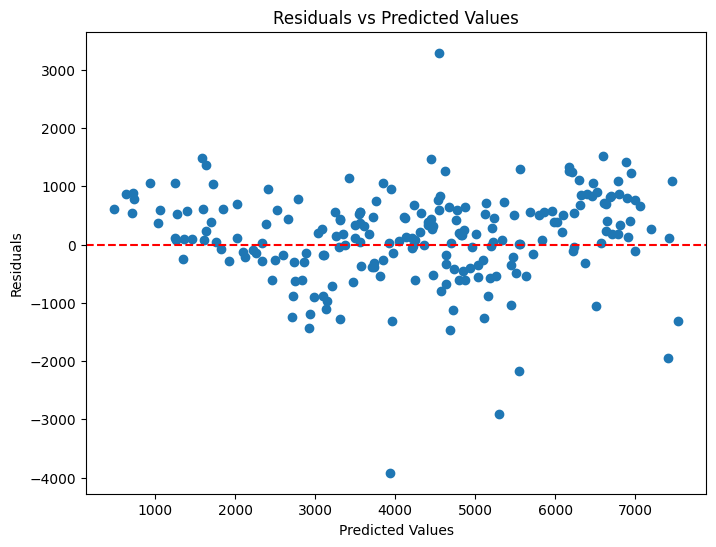

In [50]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

In [51]:
# Validating Multi Colinearity

vif =pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Features,VIF
3,temp,21.18
6,season_3,7.64
4,windspeed,5.82
2,workingday,4.95
5,season_2,4.41
7,season_4,4.32
0,yr,2.08
11,mnth_Nov,1.89
13,weekday_6,1.88
10,mnth_Jul,1.85


All variables have less than 0.56 correlation with eachother. Checking the VIF now.

Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

In [52]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw:.4f}')

Durbin-Watson statistic: 1.8305


There is almost nill auto-correlation

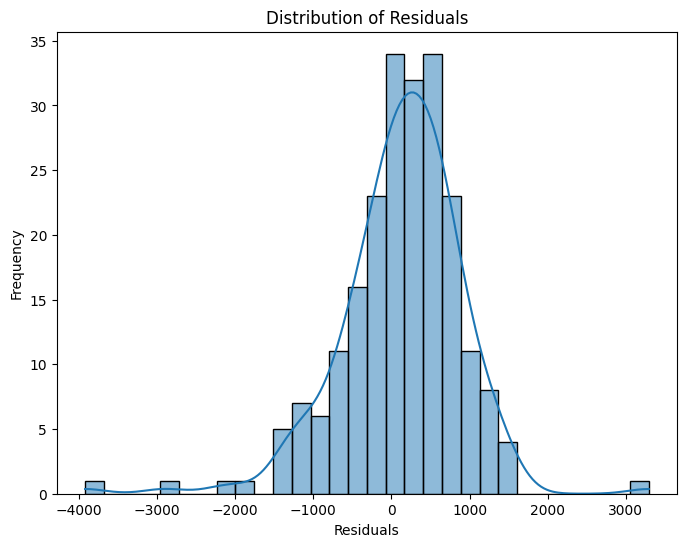

In [53]:
# Normality of Errors

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Ploting the histogram of the error terms


The error terms are normally distributed

### Making prediction using the final model

In [55]:
# Scaling the Test Dataset with the Scaler of the Training Set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- atemp
- hum
- mnth_Aug
- mnth_Feb
- mnth_Jun
- ...


In [ ]:
# Dividing into X_test and y_test


In [ ]:
# Adding the constant column

# Removing all the columns which has been removed from the last model


In [ ]:
# Making prediction using the last Model 14


### Model Evaluation

In [ ]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

In [ ]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

Write the equation of your best fitted line developed by your last model : 



Write your recommandation to the bike sharing company.